<a href="https://colab.research.google.com/github/Shaikh-Ruman/Python/blob/main/Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files


# Upload from your computer
uploaded = files.upload()

import pandas as pd
# Replace with the actual file name you uploaded
data = pd.read_csv("Fraud Detection- Sheet1.csv")
print(data.head())

Saving Fraud Detection- Sheet1.csv to Fraud Detection- Sheet1.csv
   step     type          branch   amount     nameOrig  oldbalanceOrg  \
0     7  PAYMENT          Espana  1526.50  C1908839976            0.0   
1     7  PAYMENT        Honduras  1620.17    C70432899            0.0   
2     7  PAYMENT       Indonesia  5689.82   C332151172            0.0   
3     7  PAYMENT  Estados Unidos  2211.07  C1148172078            0.0   
4     7  PAYMENT  Estados Unidos   824.63  C1142006014            0.0   

   newbalanceOrig     nameDest  oldbalanceDest  newbalanceDest  unusuallogin  \
0             0.0  M1304522697             0.0             0.0             7   
1             0.0   M252297858             0.0             0.0             2   
2             0.0  M1430674428             0.0             0.0             3   
3             0.0   M650835126             0.0             0.0            13   
4             0.0   M745868137             0.0             0.0             7   

   isFlaggedFr

In [ ]:
#Shape of dataset
data.shape

(10127, 20)

In [ ]:
#column names and data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   step                 10127 non-null  int64  
 1   type                 10127 non-null  int64  
 2   branch               10127 non-null  int64  
 3   amount               10125 non-null  float64
 4   nameOrig             10127 non-null  int64  
 5   oldbalanceOrg        10125 non-null  float64
 6   newbalanceOrig       10127 non-null  float64
 7   nameDest             10127 non-null  int64  
 8   oldbalanceDest       10126 non-null  float64
 9   newbalanceDest       10125 non-null  float64
 10  unusuallogin         10127 non-null  int64  
 11  isFlaggedFraud       10127 non-null  int64  
 12  Acct type            10127 non-null  int64  
 13  Date of transaction  10127 non-null  int64  
 14  Time of day          10127 non-null  int64  
 15  isFraud              10127 non-null 

In [ ]:
#Check for missing values
data.isnull().sum()

,0
step,0
type,0
branch,0
amount,2
nameOrig,0
oldbalanceOrg,2
newbalanceOrig,0
nameDest,0
oldbalanceDest,1
newbalanceDest,2


In [ ]:
#Check and remove duplicates
data.duplicated().sum()
data = data.drop_duplicates()
print(data.duplicated().sum())

0


In [ ]:
#Categorical columns
categorical_cols = data.select_dtypes(include=['object']).columns
LE = LabelEncoder()
for col in categorical_cols:
  data[col] = LE.fit_transform(data[col].astype(str))
  print(col)
  print(data[col].value_counts())

DayOfWeek(new)
0    2170
2    2169
4    1446
6    1445
5    1444
3     723
1     723
7       7
Name: count, dtype: int64


In [ ]:
#Skewness
skewness = data.skew().sort_values(ascending=False)
print(skewness)

amount                 13.169771
isFraud - Copy         12.080855
oldbalanceDest          3.909829
newbalanceDest          3.600117
oldbalanceOrg           2.779734
newbalanceOrig          2.738629
nameDest                0.639424
branch                  0.509031
Date of transaction     0.142950
Time of day             0.062550
DayOfWeek(new)          0.051792
unusuallogin            0.006952
Column1                 0.000000
isFlaggedFraud          0.000000
nameOrig               -0.000003
step                   -0.181078
DayOfWeek              -0.250087
type                   -0.648895
Acct type              -0.801733
isFraud               -11.992154
dtype: float64


In [ ]:
#Fraud counts
data['isFraud'].value_counts()


,count
isFraud,
Safe,10057
Fraud,68
Not reviewed,2


In [ ]:
#Correlation with Fraud
data.corr()['isFraud'].sort_values(ascending=False)

,isFraud
isFraud,1.000000
nameDest,0.070847
unusuallogin,0.063031
newbalanceOrig,0.032975
Date of transaction,0.032278
oldbalanceDest,0.021175
Column1,0.021111
step,0.014446
oldbalanceOrg,0.012440
newbalanceDest,0.011229


In [ ]:
#Average amount by fraud
if 'amount' in data.columns:
  average_amount = data.groupby('isFraud')['amount'].mean()
  print(average_amount)

isFraud
0    533463.638676
1     23748.760000
2    102004.636168
Name: amount, dtype: float64


In [ ]:
#Fraud by time
if 'Time of day' in data.columns:
  fraud_by_time = data[data['isFraud'] == 'Fraud']['Time of day'].value_counts()
  print(fraud_by_time)

Time of day
Afternoon    25
Night        24
Morning      19
Name: count, dtype: int64


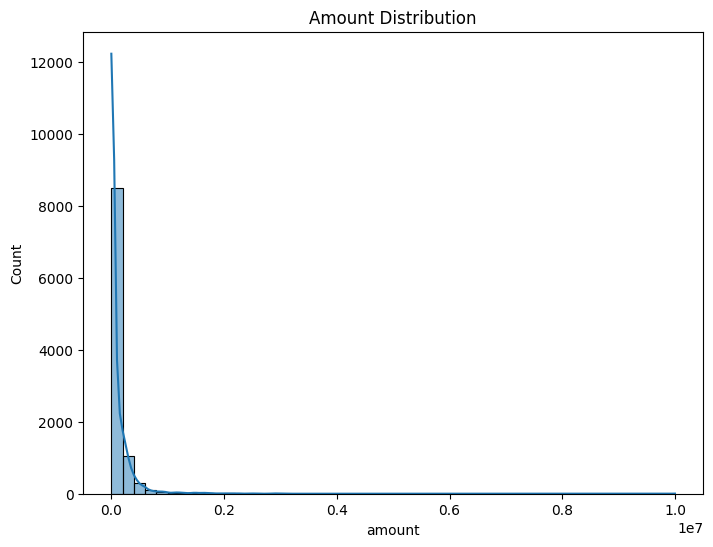

In [ ]:
#Histogram - Amount Distribution
if 'amount' in data.columns:
  plt.figure(figsize=(8,6))
  sns.histplot(data['amount'], bins = 50, kde = True)
  plt.title("Amount Distribution")
  plt.show()

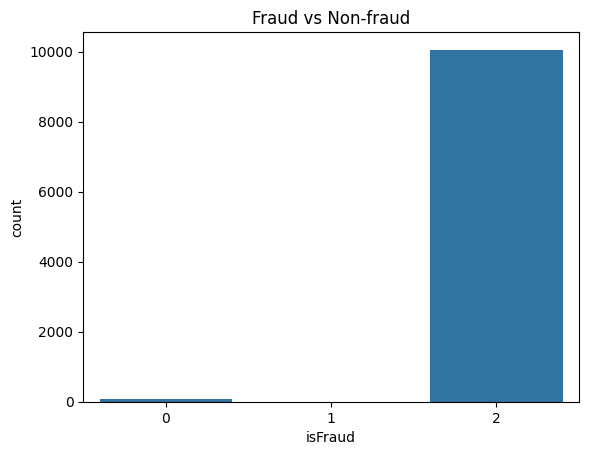

In [ ]:
#bar plot
sns.countplot(x='isFraud',data=data)
plt.title("Fraud vs Non-fraud")
plt.show()

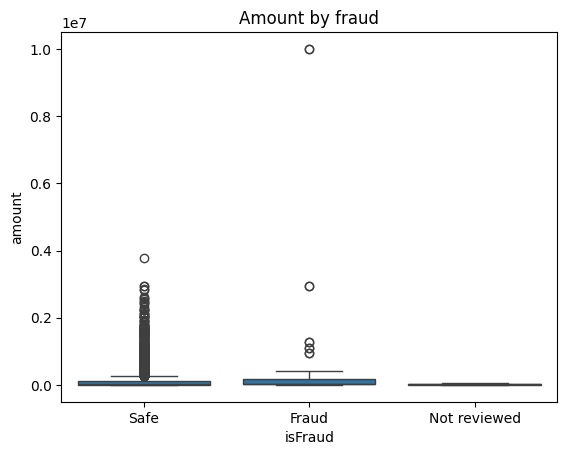

In [ ]:
#Box plot
if 'amount' in data.columns:
  sns.boxplot(x='isFraud',y='amount',data=data)
  plt.title("Amount by fraud")
  plt.show()

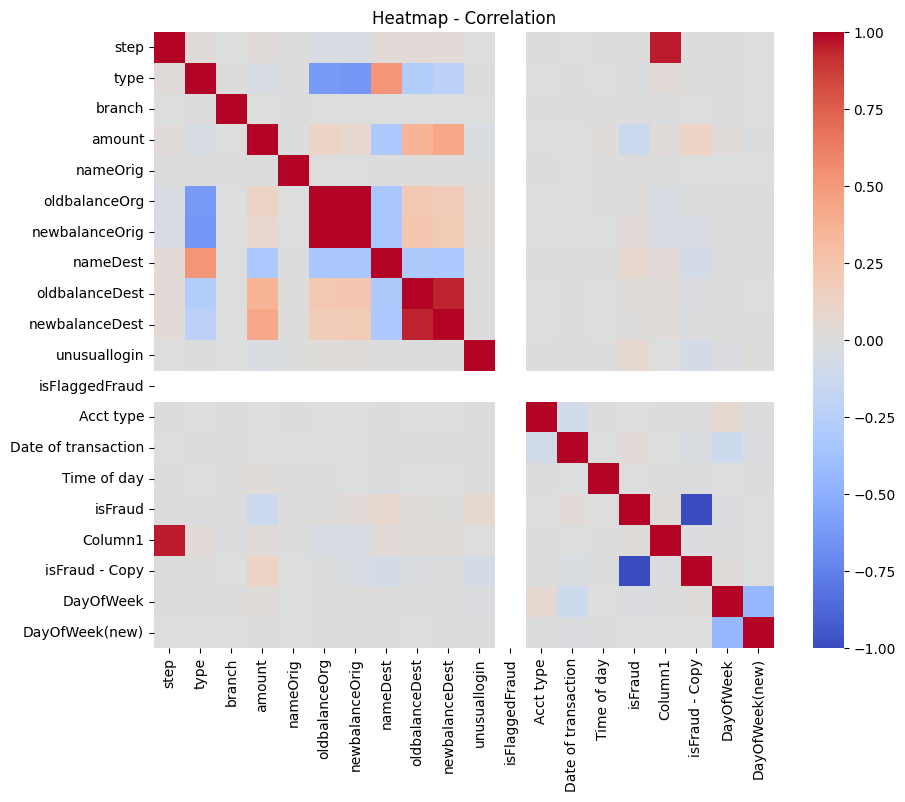

In [ ]:
#Heatmap
plt.figure(figsize=(10,8))
numeric_data = data.select_dtypes(include=np.number)
sns.heatmap(numeric_data.corr(), annot=False, cmap='coolwarm')
plt.title("Heatmap - Correlation")
plt.show()

In [ ]:
#Train-test split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

X = data.drop('isFraud', axis=1)
y = data['isFraud']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42, stratify=y)